<h1><center>Videogames</center></h1>

## Project description

You work in the "Streamly" online store, which sells computer games all over the world. Historical game sales data, user and expert ratings, genres and platforms (such as Xbox or PlayStation) are available from public sources. You need to identify the patterns that determine the success of the game. This will allow you to bid on a potentially popular product and plan advertising campaigns.

Here is the data up to 2016. Let's say it's December 2016 and you're planning a campaign for 2017. It is necessary to work out the principle of working with data. It doesn't matter if you're forecasting 2017 sales based on 2016 data or 2027 sales based on 2026 data.

The abbreviation ESRB (Entertainment Software Rating Board) comes across in the data set - this is an association that determines the age rating of computer games. The ESRB evaluates game content and assigns it to an appropriate age rating, such as Mature, Toddler, or Teen.

## Data

**Name** - the name of the game  
**Platform** - platform  
**Year_of_Release** - year of release  
**Genre** - game genre  
**NA_sales** - sales in North America (millions of copies sold)  
**EU_sales** - sales in Europe (millions of copies sold)  
**JP_sales** - sales in Japan (millions of copies sold)  
**Other_sales** - sales in other countries (millions of copies sold)  
**Critic_Score** - Critics score (maximum 100)  
**User_Score** - user score (maximum 10)  
**Rating** - rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.

## Table of contents

### [Step 1. Becoming familiar with data](#section1)  

### [Step 2. Data preparation](#section2)  
- Change the namings of the columns;
- Convert to appropriate data types;
- Missing data handling:
  - Describe how I am going to handle with missing values;
  - What are the possible reasons that led to na's;
  - Special value 'tbd' in Rating column;
- Create a column total sales.
    
### [Step 3. EDA](#section3)  
- Explore how many games were released in different years. Is data for all periods important?
- Explore how sales have changed across platforms. Select the platforms with the highest total sales and plot the distribution by year. How long does it take for new platforms to appear and old ones to disappear?
- Take the data for the relevant current period. Determine the current period yourself as a result of the study of the previous questions. The main factor is that these data will help build a forecast for 2017.
- Do not take into account the data for previous years.
- Which platforms are leading in sales, growing or falling? Pick a few potentially profitable platforms.
- Plot a box and mustache chart of global game sales by platform. Describe the result.
- See how sales within one popular platform are affected by user and critic reviews. Plot a scatterplot and calculate the correlation between reviews and sales.
- Correlate findings with sales of games on other platforms.
- Explore the overall distribution of games by genre. What about the most profitable genres? Do genres with high and low sales stand out?

 
### [Step 4. Portrait of the user of each region](#section4)  
##### Define for the user of each region (NA, EU, JP):
- Most popular platforms (top 5).
- The most popular genres (top 5).
- Does the ESRB rating affect sales in a particular region?

### [Step 5. Test the hypothesis](#section5)  
- The average user ratings of the Xbox One and PC platforms are the same;
- The average user ratings of the genres Action and Sports are different.


### [Step 6. General conclusion](#section6)  

___

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

#import plotly.io as pio
#pio.renderers.default = "png"
#png_renderer.width = 500
#png_renderer.height = 500

#pio.renderers.default = "browser"

# Step 1. Becoming familiar with data <a class="anchor" id="section1"></a>

In [2]:
df = pd.read_csv('games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 16715
Number of columns: 11


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


> **Year of release is given in float, should be converted to integer.**  
> **User ratings need to be converted from object type to float type.** 

In [5]:
df.isna().sum() # missing values

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

> **Missing values in `name` column will be imputed with " ".**  
> **`Year_of_Release` , `Critic_Score` , `User_Score` , `Rating` - going to keep the missing values as is**

## Step 2. Data preparation <a class="anchor" id="section2"></a>

In [6]:
columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 
           'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']
df.columns = columns # change column names

In [7]:
df.fillna(
    {"name" : " ", 
     "genre" : " "}, inplace=True)

df['user_score'] = df['user_score'].replace("tbd", np.NaN) # change "tbd" - "to be determined" to NaN

In [8]:
# Convert to integer type
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['critic_score'] = df['critic_score'].astype('Int64')

# User scores to float
df['user_score'] = df['user_score'].astype(float)

>  **The missing values in the columns `year_of_release` , `critic_score` , `user_score` , `rating` will be left blank, since their filling may distort the statistics.**

In [9]:
# aa total sales column
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

# Step 3. EDA <a class="anchor" id="section3"></a>

### See how many games were released over the years.

In [10]:
Sales = df.groupby('year_of_release')[['total_sales']].sum()
Number = df.groupby('year_of_release')[['name']].count()
df1 = Sales.join(Number)
df1.columns = ['Total_Sales', 'Number_of_games']

In [11]:
trace0 = go.Scatter(
    x=df1.index,
    y=df1.Total_Sales,
    name='Sold games, millions'
)

trace1 = go.Scatter(
    x=df1.index,
    y=df1.Number_of_games,
    name='Number of produced games'
)

data = [trace0, trace1]
layout = {'title': 'Statistics of video games'}

fig = go.Figure(data=data, layout=layout)
#fig.show()
iplot(fig, show_link=False)

> **Two points can be seen, starting from which the trend changes - these are 1994 and 2000.**

### See how sales have changed across platforms. Select the platforms with the highest total sales and plot the distribution by year. How long does it take for new platforms to appear and old ones to disappear?

In [12]:
# Let's leave the data only since 2000. It was from this moment that the significant growth of the video game market began.
df_2000 = df[df['year_of_release'] >= 2000]

##### Let's pick five platforms with the highest total sales

In [13]:
platforms_leaders = df_2000.groupby('platform')['total_sales'].sum().sort_values()[-5:].index.tolist()

In [14]:
data = []

for platform in platforms_leaders:
    data.append(
        go.Bar(x=df_2000[df_2000.platform==platform].groupby("year_of_release")['total_sales'].sum().index,
               y=df_2000[df_2000.platform==platform].groupby("year_of_release")['total_sales'].sum(),
               name=platform)
    )
layout = {'title': 'Sales'}
    
fig = go.Figure(data=data, layout=layout)
fig.show()
#iplot(fig, show_link = False)

> ##### It can be seen that each of the platforms 'lived' for about 10 years
- **PS2** from *2000* to *2010* (exactly 10 years)
- **DS** from *2004* to *2013* (9 years)
- **X360** *2006* to *2015* (9 years)
- **Wii** *2006* - *2015* (9 years)
- **PS3** *2006* - *2016* (10 years)

> ### Many new platforms appear in 2006 (for example: Wii, PS3, X360), while the characteristic lifespan is 10 years. Thus, we will leave only current data, starting from 2006.

In [15]:
df = df[df['year_of_release'] >= 2006]

## Which platforms are leading in sales, rising or falling?

In [16]:
data = []

for platform in df['platform'].unique():
    data.append(
        go.Scatter(x=df[df.platform==platform].groupby("year_of_release")['total_sales'].sum().index,
               y=df[df.platform==platform].groupby("year_of_release")['total_sales'].sum(),
               name=platform)
    )
layout = {'title': 'Sales by years'}
    
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link = False)

> #### In general, sales across all platforms are falling. The most profitable platforms are:
> - **PS4**
> - **XOne**
> - **3DS**  
>  **For all other platforms, sales are approximately the same.**

## Plot a box plot of global game sales by platform.

In [17]:
data = []

for platform in df['platform'].unique():
    data.append(
        go.Box(y=df[df.platform==platform]['total_sales'], 
               name=platform )
    )
    
layout = {'title': 'Sales by platform'}
fig = go.Figure(data=data, layout=layout)

fig.update_layout(yaxis=dict(range=[0,1])) # Change the scale on the y axis

iplot(fig, show_link = False)

> **Platforms *X360* and *PS3* have the highest median sales.**  
> **Almost all platforms have a lot of outliers - best games.**  
> **There is a DC platform that has very little sales.**  
> **Computer games (PC) are cheaper than console games.**

## Examine how sales within one popular platform are impacted by user and critic reviews. Plot a scatterplot and calculate the correlation between reviews and sales. 

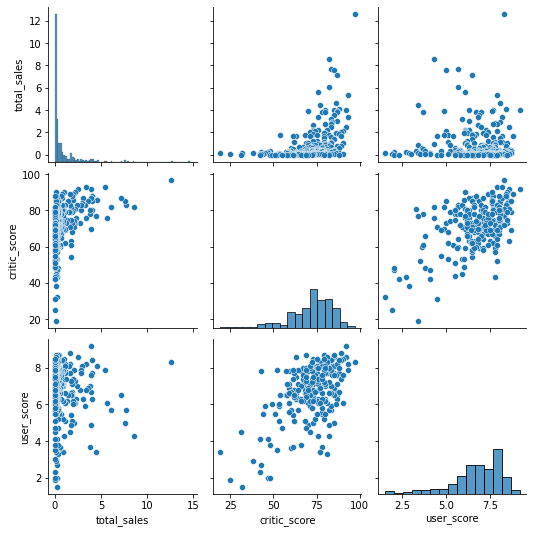

In [18]:
sns.pairplot(df[df.platform == "PS4"][['total_sales', 'critic_score', 'user_score']])
plt.show()

> **Games with high critical score tend to sell better.**  
> In the case of `user score`, not everything is so clear and there are games that do not sell so well, but are still highly rated by users

In [19]:
print("Correlation matrix")
df[df.platform == "PS4"][['total_sales', 'critic_score', 'user_score']].corr()

Correlation matrix


,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


> **The correlation between `total_sales` and `critic_score` is 0.4, which is expected, we saw this dependence on the graph.**  
> **There is no correlation between `total_sales` and `user_score`.**

## Look at the overall distribution of games by genre. What about the most profitable genres? Do genres with high and low sales stand out?

In [20]:
x=df.groupby("genre")['genre'].count()
genres = x.index

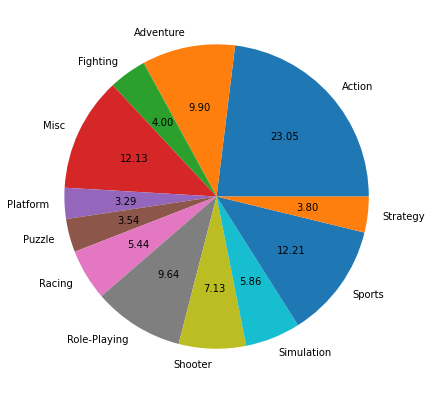

In [21]:
plt.figure(figsize=(20,7))
plt.pie(x=x, labels=genres, autopct="%.2f")
plt.show()

> **Most of the games are action games, that followed by sports, misc and adventure**

In [22]:
df.groupby('genre')[['total_sales']].sum().sort_values('total_sales', ascending=False).style.bar()

,total_sales
genre,
Action,1116.650000
Sports,793.850000
Shooter,717.040000
Misc,554.860000
Role-Playing,522.400000
Racing,299.000000
Platform,279.740000
Simulation,220.650000
Fighting,188.420000


> **Action** games are the most bought, probably due to the fact that games of this genre are released more than others.  
**Sports** comes in second in terms of both the number of games released and sales.  
**Shooter** is unexpectedly in the third place in sales, although there are almost half as many games produced.  
**Adventure** is far behind in sales, although there are many games released.  

# Step 4. User portrait of each region <a class="anchor" id="section4"></a>

##### Define for the user of each region (NA, EU, JP):
- Most popular platforms (top 5).

In [23]:
traces = []
for region in ["na", "eu", "jp"]:
    traces.append(
        go.Scatter(
            x=df.groupby('platform')[region+'_sales'].sum().sort_values()[-5:].index.tolist(), 
            y=df.groupby('platform')[region+'_sales'].sum().sort_values()[-5:],
            name = region, 
            visible = (region == 'na'))
    )
    
layout = go.Layout(
    title="Platform sales by region",
    updatemenus=list([
        dict(
            x=-0.05,
            y=1,
            yanchor='top',
            buttons=list([
                dict(
                    args=['visible', [True] + [False]*3],
                    label='NA',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False] + [True] + [False]*2],
                    label='EU',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False]*2 + [True] + [False]],
                    label='JP',
                    method='restyle'
                )
            ]),
        )
    ]),
)

fig = {'data': traces, 'layout': layout}
iplot(fig, show_link=False)

> **X360 is the most popular platform in NA.**  
> **Europeans prefer PS3.**  
> **DS is popular in Japan.**

- The most popular genres (top 5).

In [24]:
#NA
NA_index = df.groupby('genre')['na_sales'].sum().sort_values()[-5:].index.tolist()
NA_values = df.groupby('genre')['na_sales'].sum().sort_values()[-5:]

#EU
EU_index = df.groupby('genre')['eu_sales'].sum().sort_values()[-5:].index.tolist()
EU_values = df.groupby('genre')['eu_sales'].sum().sort_values()[-5:]

#JP
JP_index = df.groupby('genre')['jp_sales'].sum().sort_values()[-5:].index.tolist()
JP_values = df.groupby('genre')['jp_sales'].sum().sort_values()[-5:]

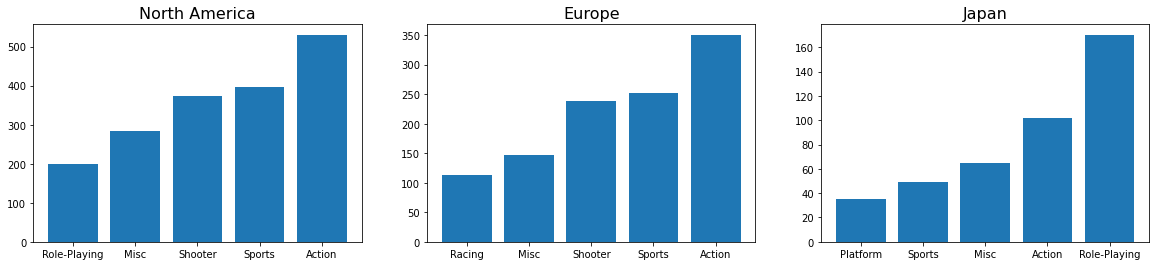

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))

ax1.bar(NA_index, NA_values)
ax1.set_title("North America", fontsize=16)

ax2.bar(EU_index, EU_values)
ax2.set_title("Europe", fontsize=16)

ax3.bar(JP_index, JP_values)
ax3.set_title("Japan", fontsize=16)

plt.show()

> **In *NA* and *EU* the most popular genres are practically the same. Only the fif-th places differ.**  
> **In *JP* tastes are very different from NA and EU, the *RPG* genre is in the first place, there is no *Shooter* genre at all, and the *Platform* genre comes to its place in the top 5.**

- Does the ESRB rating affect sales in a particular region?

In [26]:
def box_ESRB(region, down=0, up=1):
    """
    boxplot funct 
    region - "na", "eu" or "jp"
    down - y limit
    up - y limit 
    """
    
    data = []
    
    for value in unique_rating:
        data.append(
            go.Box(y=df_3[df_3["rating"]==value][region+"_sales"], 
                       name=value) )

    layout={'title':"Sales in "+str.upper(region)+" depending on ESRB"}
    fig = go.Figure(data=data, layout=layout)

    fig.update_layout(yaxis=dict(range=[down, up])) # y scale

    iplot(fig, show_link = False)

In [27]:
df_3 = df.copy(deep=True)

In [28]:
df_3["rating"] = df_3['rating'].fillna("undefined") # Replace missing values with undefined

In [29]:
unique_rating = df_3['rating'].unique().tolist()
unique_rating # Unique age rating values

['E', 'M', 'undefined', 'T', 'E10+', 'EC', 'RP']

Description:  
- "EC" ("Early childhood") - "For young children"
- "E" ("Everyone") - "For everyone"  
- "E10+" - "Everyone 10 and older"  
- "T" ("Teen") - "Teens"  
- "M" ("Mature") - "For adults"  
- "RP" ("Rating Pending") - "Rating is pending"

In [30]:
box_ESRB("na")

In [31]:
box_ESRB("eu")

In [32]:
box_ESRB("jp", 0 , 0.1)

> **In all regions, games with a rating of M - "For adults" are in the lead.**  
> **In North America, games for young children also occupy a large part of the market.**  
> **There are a lot of M and T rated games in Japan, and the rest are extremely unpopular.**

# Step 5. Test the hypotheses <a class="anchor" id="section5"></a>

In [33]:
from scipy import stats as st

- **Average user ratings for Xbox One and PC platforms are the same**

In [34]:
sample_1 = df[df['platform']=="XOne"]['user_score'].dropna() # Xbox One user ratings
sample_2 = df[df['platform']=="PC"]['user_score'].dropna()

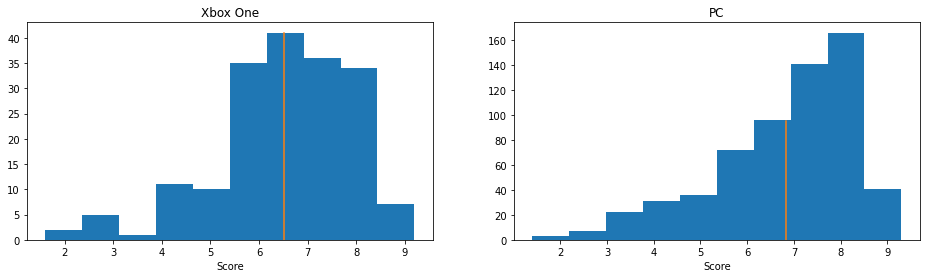

               Variance Xbox One - 1.91;                                           Variance PC - 2.32;

Variances differ: 21.41%


In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.hist(sample_1)
ax1.plot([sample_1.mean(), sample_1.mean()], [0, 41])
ax1.set_title("Xbox One")
ax1.set_xlabel("Score")

ax2.hist(sample_2)
ax2.plot([sample_2.mean(), sample_2.mean()], [0, 95])
ax2.set_title("PC")
ax2.set_xlabel("Score")

plt.show()
print("               Variance Xbox One - {:.2f};                                           Variance PC - {:.2f};".format(sample_1.var(),  sample_2.var()))
print("\nVariances differ: {:.2%}".format(sample_2.var()/sample_1.var() -1))

#### Levene test

In [36]:
from scipy.stats import levene
stat, p = levene(sample_1, sample_2)
p

0.203712269703899

#### The value of p according to the Levene test is quite large, therefore, we will assume that the dispersions are equal.

> ##### The Levene test showed that there is no reason to consider the variances are different, so we will use the equal_var parameter equal to <span style="color:green">True</span>

**Ho - average user ratings for *XBox One* and *PC* platforms are equal,**  
**H1 - average scores differ.**

In [37]:
alpha = .05 # critical level of statistical significance
            # if p-value is less than it - reject the hypothesis

results = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var = True)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Reject the null")
else:
    print("Failed to reject the null hypothesis") 

p-value: 0.014354742043413306
Reject the null


> #### This means that the average rating of users of the **XBox One** platform is different from the average rating of users of the **PC** platform. The hypothesis was not confirmed.

- **Average user ratings for the Action and Sports genres are different.**


In [38]:
sample_3 = df[df['genre']=="Action"]['user_score'].dropna()
sample_4 = df[df['genre']=="Sports"]['user_score'].dropna()

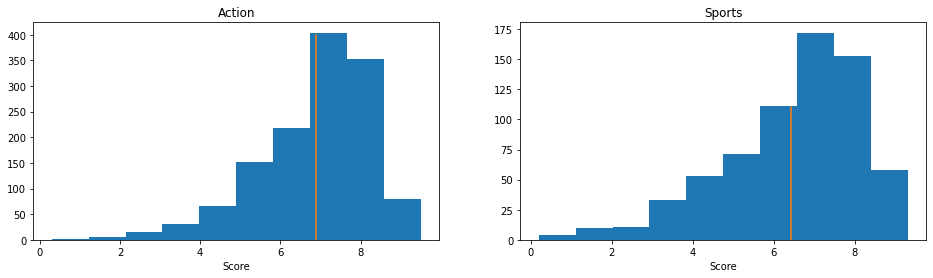

               Variance Action - 1.86;                                           Variance Sports - 2.73;


Variances differ by: 46.93%


In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.hist(sample_3)
ax1.plot([sample_3.mean(), sample_3.mean()], [0, 400])
ax1.set_title("Action")
ax1.set_xlabel("Score")

ax2.hist(sample_4)
ax2.plot([sample_4.mean(), sample_4.mean()], [0, 110])
ax2.set_title("Sports")
ax2.set_xlabel("Score")

plt.show()

print("               Variance Action - {:.2f};                                           Variance Sports - {:.2f};\n".format(sample_3.var(),  sample_4.var()))
print("\nVariances differ by: {:.2%}".format(sample_4.var()/sample_3.var() -1))

### Levene test

In [40]:
from scipy.stats import levene
stat, p = levene(sample_3, sample_4)
p

1.369522618390061e-06

### The value of p according to the Levene test is very small, therefore, we will consider the variances to be different.

#### Ho - average user ratings for **Action** and **Sports** genres are equal;
#### H1 - average scores differ

In [41]:
alpha = .05

results_2 = st.ttest_ind(
    sample_3, 
    sample_4,
    equal_var = False)

print('p-value:', results_2.pvalue)

if (results_2.pvalue < alpha):
    print("Reject the null")
else:
    print("Failed to reject the null hypothesis") 

p-value: 5.319061853268226e-10
Reject the null


> #### The ratings of users of Action and Sports games are different. The hypothesis was confirmed!

# Step 6. General conclusion <a class="anchor" id="section6"></a>

> ### Step 1: Getting familiar with the data
> - We got acquainted with the data, looked at the general information about the dataset, identified gaps and inconsistencies in data types.

> ### Step 2. Data preparation
> - In this step, we filled in some gaps, found an unusual value for `tbd` - "to be determined" and replaced this value with NaN.
> - We left many gaps, for example, in the `scores` columns, so as not to distort the statistics.
> - Also at this stage, we calculated the total number of sales for all regions and recorded the result in the `total_sales` column.

> ### Step 3: Exploratory Data Analysis
> - It was found that a sharp increase in the release of games occurred in *2000*, and the peak in *2008-2009*.
> - The typical lifetime of the platform is 10 years, so we will leave the data from *2006 to 2016*.
> - 3 potentially profitable platforms - *PS4*, *XOne*, *3DS*.
> - The largest median sales for platforms *X360* and *PS3*.
> - Almost all platforms have certain games that have taken off.
> - Computer games *PC* are cheaper than console games.
> - Critics' ratings have very little effect on overall sales, user ratings have no effect at all.
> - Most games in the **Action** genre, followed by **Sports**, **misc** and **adventure**.
> - **Action** is the best buying game, **Sports** is in second place, **Shooter** is unexpectedly in third place in terms of sales.
> - Adventure is far behind in sales, although there are many games released.

> ### Step 4. Region user portrait
> - In *NA*, the most popular platform is **X360**. *Europeans* prefer **PS3**. In *Japan* **DS** are popular.
> - In *NA* and *EU* the most popular genres are practically the same. In JP, tastes are very different.
> - Games with a rating of **M** - "For adults" are in the lead in all regions. In *North America* games for **little children** occupy the majority of the market. In *Japan* there are a lot of games rated **M** and **T**, and the rest are extremely unpopular.

> ### Step 5. Hypothesis testing
> - Average user ratings for *Xbox One* and *PC* platforms are the same. **The hypothesis was not confirmed**.
> - Average user ratings for **Action** and **Sports** genres are different. **The hypothesis was confirmed!**.